In [ ]:
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH

from google.colab import drive;

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!sudo apt install graphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install stanza


     |████████████████████████████████| 432 kB 2.7 MB/s 
     |████████████████████████████████| 175 kB 63.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=97bc38a1a8dad7e778950252c2944195a694ded709cf7193c61ed3eec421f66e
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


# **CHATBOT simple**



In [ ]:
from datetime import datetime;

import numpy  as np;
import pandas as pd;

import json;

# https://stanfordnlp.github.io/stanza/index.html
import stanza;

stanza.download('es')

nlp = stanza.Pipeline(lang='es', processors='tokenize, lemma')


2022-03-14 15:49:53 INFO: Downloading default packages for language: es (Spanish)...


2022-03-14 15:50:15 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-03-14 15:50:15 WARNING: Language es package default expects mwt, which has been added
2022-03-14 15:50:15 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| lemma     | ancora  |

2022-03-14 15:50:15 INFO: Use device: cpu
2022-03-14 15:50:15 INFO: Loading: tokenize
2022-03-14 15:50:15 INFO: Loading: mwt
2022-03-14 15:50:15 INFO: Loading: lemma
2022-03-14 15:50:15 INFO: Done loading processors!


##Obtención de datos


In [ ]:
# leemos los "intents"

#with open("/content/drive/MyDrive/Colab Notebooks/Sistemas/Chatbot/intents.json", 'r') as fd:
#     INTENTS = json.load(fd)

INTENTS=json.loads("""
{
 "saludo"    : ["hola","qué hay","qué pasa", "Hola", "Hola, qué tal"],
 "name" :      ["soy @","mi nombre es @","me llamo @"],
 "tapeo"     : ["ir de tapas", "ir a tapear", "vamos a tomar unas tapas", "vamos a tomar algo", "quiero ir de tapeo", "quiero ir de tapas"],
 "ciudad"    : ["qué ver en coruña", "qué visitar en coruña", "puntos de interés en a coruña"],
 "cerveza"   : ["estrella galicia", "tomar cerveza", "visitar la estrella"],
 "evendepor" : ["qué eventos deportivos hay", "Deportivo", "visitar el estadio de Riazor", "Liceo", "Basket Coruña", "Deportivo de la Coruña"],
 "coruña"    : ["qué se puede hacer en A coruña","qué se puede hacer en La Coruña","qué se puede hacer en A Coruña","qué se puede hacer en Coruña"],
 "cine"      : ["quiero ir al cine", "quiero ver una película", "quiero ver la cartelera de los cines", "películas en los cines", "cartelera de películas"],
 "mercado"   : ["tengo que hacer la compra", "tengo que ir al mercado", "tengo que ir al supermercado","tengo que ir al super", "tengo que ir a hacer la compra"],
 "entreten"  : ["qué puedo hacer hoy", "estoy aburrido", "sabes algún plan para", "quiero hacer algo divertido"],
 "yo"        : ["y tu", "como estas"],
 "¿hora?"    : ["qué hora es", "tienes hora", "me gustaría saber la hora", "qué hora será"],
 "ayuda"     : ["necesito ayuda", "me puedes ayudar", "me podrías decir", "me ayudas", "puedes ayudarme con"],
 "dudas"     : ["tengo una duda", "me gustaría saber", "dudas", "quería saber", "sabes si"],
 "meteo"     : ["lloverá mañana", "que tiempo hace", "hace sol", "hace frio", "está nevando", "hace mucho viento", "parece que va a llover", "parece que hace calor"],
 "predic"    : ["podrías darme la predicción del tiempo para", "me puedes decir la predicción meteorológica", "qué tiempo hará mañana", "el tiempo de mañana"],
 "deporte"   : ["haces deporte", "practicas deporte", "juegas en algún uquipo de fútbol", "tenis", "baloncesto", "juegas al padel", "te gusta el deporte", "quiero ver un partido de", "programación deportiva"],
 "tema"      : ["sobre qué quieres hablar", "dime un tema de conversación", "de qué quieres hablar", "sobre qué más puedes hablar", "de qué hablamos", "qué me puedes contar"],
 "politica"  : ["qué opinas de la guerra", "de que partido político", "eres de izquieras o de derechas", "guerra de Rusia y Ucrania"],
 "info"     : ["qué sabes sobre", "sabes algo sobre", "necesito todo lo que sepas sobre"],
 "busca"     : ["información sobre","necesito información sobre", "dame información sobre","donde puedo buscar", "donde puedo buscar información"],
 "compras"   : ["quiero comprar", "voy a comprar", "voy de compras", "estoy interesado en comprar","quiero comprar un", "quiero comprar algo" ],
 "comida"    : ["donde puedo ir a cenar", "donde puedo ir a comer", "donde puedo ir a desayunar", "conoces algún restaurante bueno", "donde se puede comer bien", "me gustaría ir a comer", "quiero ir a cenar", "salir a comer", "salir a cenar", "quiero ir a comer"],
 "restaurant": ["busco un restuarante", "quiero comer", "me apetece comida", "me apetece un restaurante", "quiero comida", "me apetece comida", "me apetece ir a un restuarante","comida italiana", "restaurante con estrellas","quiero un restaurante"],
 "afirma"    : ["Si", "si"],
 "noticias"  : ["últimas noticias", "noticias sobre", "mostrarme nociticias", "ver las noticias"],
 "despedida" : ["adios","hasta luego","hasta siempre"]
}
""");

assert len(INTENTS)>0
INTENTS
len(INTENTS)

27

In [ ]:
# leemos las "responses"

#with open("/content/drive/MyDrive/Colab Notebooks/Sistemas/Chatbot/responses.json", 'r') as fd:
#     RESPONSES = json.load(fd)

RESPONSES=json.loads("""
{
 "despedida" : "hasta la vista!",
 "name"         : "Hola @name, soy chatbot",
 "tapeo"     : "si quieres ir de tapeo por la ciudad: https://www.tripadvisor.es/Restaurants-g187507-zfd10942-La_Coruna_Province_of_A_Coruna_Galicia-Tapas.html",
 "ciudad"    : "si quieres visitar la ciudad: https://www.sitiosdeespana.es/articulo/los-10-mejores-lugares-que-ver-en-a-coruna",
 "cerveza"   : "si te gusta la cerveza mira esto: https://mundoestrellagalicia.es/",
 "evendepor" : "Puedes ver los eventos deportivos de la ciudad aquí: https://www.coruna.gal/deportes/es/agenda?argIdioma=es",
 "coruña"    : "puedes hacer muchas cosas interesantes, visitar la ciudad, ir a eventos deportivos, tomar cerveza, ir de tapas",
 "cine"      : "Aquí puedes ver las películas en A coruña: https://www.enterat.com/ocio/cartelera-cines-a-coruna.php",
 "mercado"   : "Si tienes que hacer la compra puedes hacerlo desde esta web y te la traen a casa: https://kibus.online/",
 "entreten"  : "es posible que encuentres algo interesante aquí: https://www.laopinioncoruna.es/ocio/agenda/eventos/a-coruna_m/que-hacer-hoy_f/",
 "noticias"  : "aquí puedes ver las últimas noticias: https://www.meneame.net/",
 "afirma"    : "@si",
 "restaurant": "puedes buscar aquí: https://guide.michelin.com/es/es/articulo/news-and-views/guia-michelin-espana-portugal-2022-lista-completa-de-las-estrellas",
 "comida"    : "que tipo de restaurante o comida buscas",
 "compras"   : "si estás pensando en comprar posiblemente puedas hacerlo aquí: https://www.amazon.es/",
 "busca"     : "Todo lo que se sobre ello lo puedes ver aquí: https://www.google.com/ ",
 "info"      : "puedes buscar esa información aquí: https://es.wikipedia.org/wiki/Wikipedia",
 "politica"  : "La política es un tema escabroso, si no coincidimos es complicado que nos pongamos de acuerdo, asi que, mejor hablamos de otra cosa",
 "tema"      : "decide tú, a mi me da igual",
 "deporte"   : "no puedo hacer deporte, no tengo ni brazos ni piernas, pero si quieres puedes ver la programación deportiva de hoy: https://www.futbolenlatv.es/deporte",
 "predic"    : "@predic",
 "meteo"     : "aquí saber el tiempo que va a hacer siempre es complicado, por si acaso lleva un paraguas",
 "dudas"     : "dime que quieres saber",
 "ayuda"     : "qué necesitas?",
 "¿hora?"    : "@hora",
 "yo"        : "bien",
 "saludo"    : "Hola, qué tal?"
}
""");

assert len(RESPONSES)>0
RESPONSES

len(RESPONSES)

27

In [ ]:
# compruebo que para cada 'intent' hay un 'response'.
# no compruebo lo contrario, porque si hay 'responses' de más no afecta al resultado.

assert all([intent in RESPONSES for intent in INTENTS])

In [ ]:
# BAG OF WORDS (bow)

bow=set();

for i in INTENTS:
    for s in INTENTS[i]:
        text=nlp(s);
        [bow.add(word.lemma) for sentence in text.sentences for word in sentence.words];

bow.remove("@");
bow=tuple(bow);
bow

/usr/local/lib/python3.7/dist-packages/stanza/models/common/beam.py:86: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  prevK = bestScoresId // numWords


('Liceo',
 'a',
 'salir',
 'si',
 'película',
 'baloncesto',
 'yo',
 'mercado',
 'mi',
 'como',
 'galicia',
 'adios',
 'conoz',
 'mañana',
 'padel',
 'hola',
 'sobre',
 'pasar',
 'ayuda',
 'visitar',
 'hoy',
 'noticia',
 'nociticia',
 'Coruña',
 'restuarante',
 'querer',
 'para',
 'viento',
 'evento',
 'dame',
 'y',
 'político',
 'deportivo',
 'cartelera',
 'hacer',
 'bien',
 'dar',
 'tema',
 'ir',
 'tener',
 'izquieras',
 'tapo',
 'conversación',
 'saber',
 'tu',
 'este',
 'tiempo',
 'meteorológico',
 'plan',
 'más',
 'él',
 'super',
 'ver',
 'tapeo',
 'interés',
 'que',
 'hora',
 'parecer',
 'Rusia',
 'cenar',
 'Basket',
 'contar',
 'coruña',
 'con',
 'estrella',
 'tú',
 'compra',
 'buen',
 'deporte',
 'llover',
 'el',
 'divertido',
 'donde',
 'siempre',
 'opino',
 'nevando',
 'información',
 'poder',
 'supermercado',
 'predicción',
 'sepa',
 'haber',
 'decir',
 'calor',
 'punto',
 'estar',
 'o',
 'mucho',
 'apetecer',
 'de',
 'derecha',
 'nombre',
 'desayunar',
 'tomar',
 'Deportivo

In [ ]:
# CLASES

classes=set();

for i in INTENTS:
    classes.add(i);

classes=tuple(classes);

print(classes);


('ciudad', 'cerveza', 'yo', 'restaurant', 'mercado', 'noticias', 'entreten', 'ayuda', 'meteo', 'tapeo', 'dudas', 'compras', 'comida', 'info', 'politica', 'busca', 'coruña', 'predic', '¿hora?', 'name', 'afirma', 'cine', 'saludo', 'tema', 'deporte', 'evendepor', 'despedida')


##Creamos el modelo

In [ ]:
# creamos el DataFrame
# el tamaño del DataFrame es ( len(bow)+1, QUERIES )

data=[];

for i in INTENTS:
    for s in INTENTS[i]:
        text=nlp(s);
        words=[word.lemma for sentence in text.sentences for word in sentence.words];
        l=[word in words for word in bow]+[i];
        data.append(l);

dataframe=pd.DataFrame(data);
dataframe.columns=list(bow)+["intent"];
dataframe

/usr/local/lib/python3.7/dist-packages/stanza/models/common/beam.py:86: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  prevK = bestScoresId // numWords


,Liceo,a,salir,si,película,baloncesto,yo,mercado,mi,como,...,tal,uquipo,practica,todo,Riazor,italiano,ayudar,alguno,en,intent
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,saludo
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,saludo
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,saludo
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,saludo
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,saludo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,noticias
130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,noticias
131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,despedida
132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,despedida


In [ ]:
# convertimos los datos en números

from sklearn import preprocessing;

for word in bow:
    dataframe[word]=dataframe[word].astype(np.uint8);

le = preprocessing.LabelEncoder();
dataframe["intent"]=le.fit_transform(dataframe["intent"])
intents=le.classes_;
dataframe

,Liceo,a,salir,si,película,baloncesto,yo,mercado,mi,como,...,tal,uquipo,practica,todo,Riazor,italiano,ayudar,alguno,en,intent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,18
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


##Entrenamiento

In [ ]:
from sklearn.ensemble import RandomForestClassifier;

X=dataframe.iloc[:,0:len(bow)];
y=dataframe.iloc[:,-1];

#clf = RandomForestClassifier(max_depth=len(INTENTS), random_state=42);
clf = RandomForestClassifier(max_depth=dataframe.shape[0], random_state=42);
clf.fit(X.values, y.values)

RandomForestClassifier(max_depth=134, random_state=42)

##Almacenamos el modelo

In [ ]:
import os;
import pickle;

ROOT="/content/drive/MyDrive/Programacion";

DATA={
      "intents"  : intents,
      "responses": RESPONSES,
      "bow"      : bow,
      "classes"  : classes,
      "model"    : clf,
     };

with open(os.path.join(ROOT,"model.bin"),"wb") as fd:
     fd.write(pickle.dumps(DATA));

# Borramos todo lo relacionado con el modelo, para partir de cero.

In [ ]:
import sys;

_this = sys.modules[__name__];
for v in dir():
    if v[0]!='_': delattr(_this, v);
del _this;

##Modelo en producción

In [ ]:
import os;
import pickle;


ROOT="/content/drive/MyDrive/Programacion";

with open(os.path.join(ROOT,"model.bin"),"rb") as fd:
     data=fd.read();
     DATA=pickle.loads(data);

intents  =DATA["intents"];
RESPONSES=DATA["responses"];
bow      =DATA["bow"];
classes  =DATA["classes"];
clf      =DATA["model"];

##Visualizamos uno de los árboles

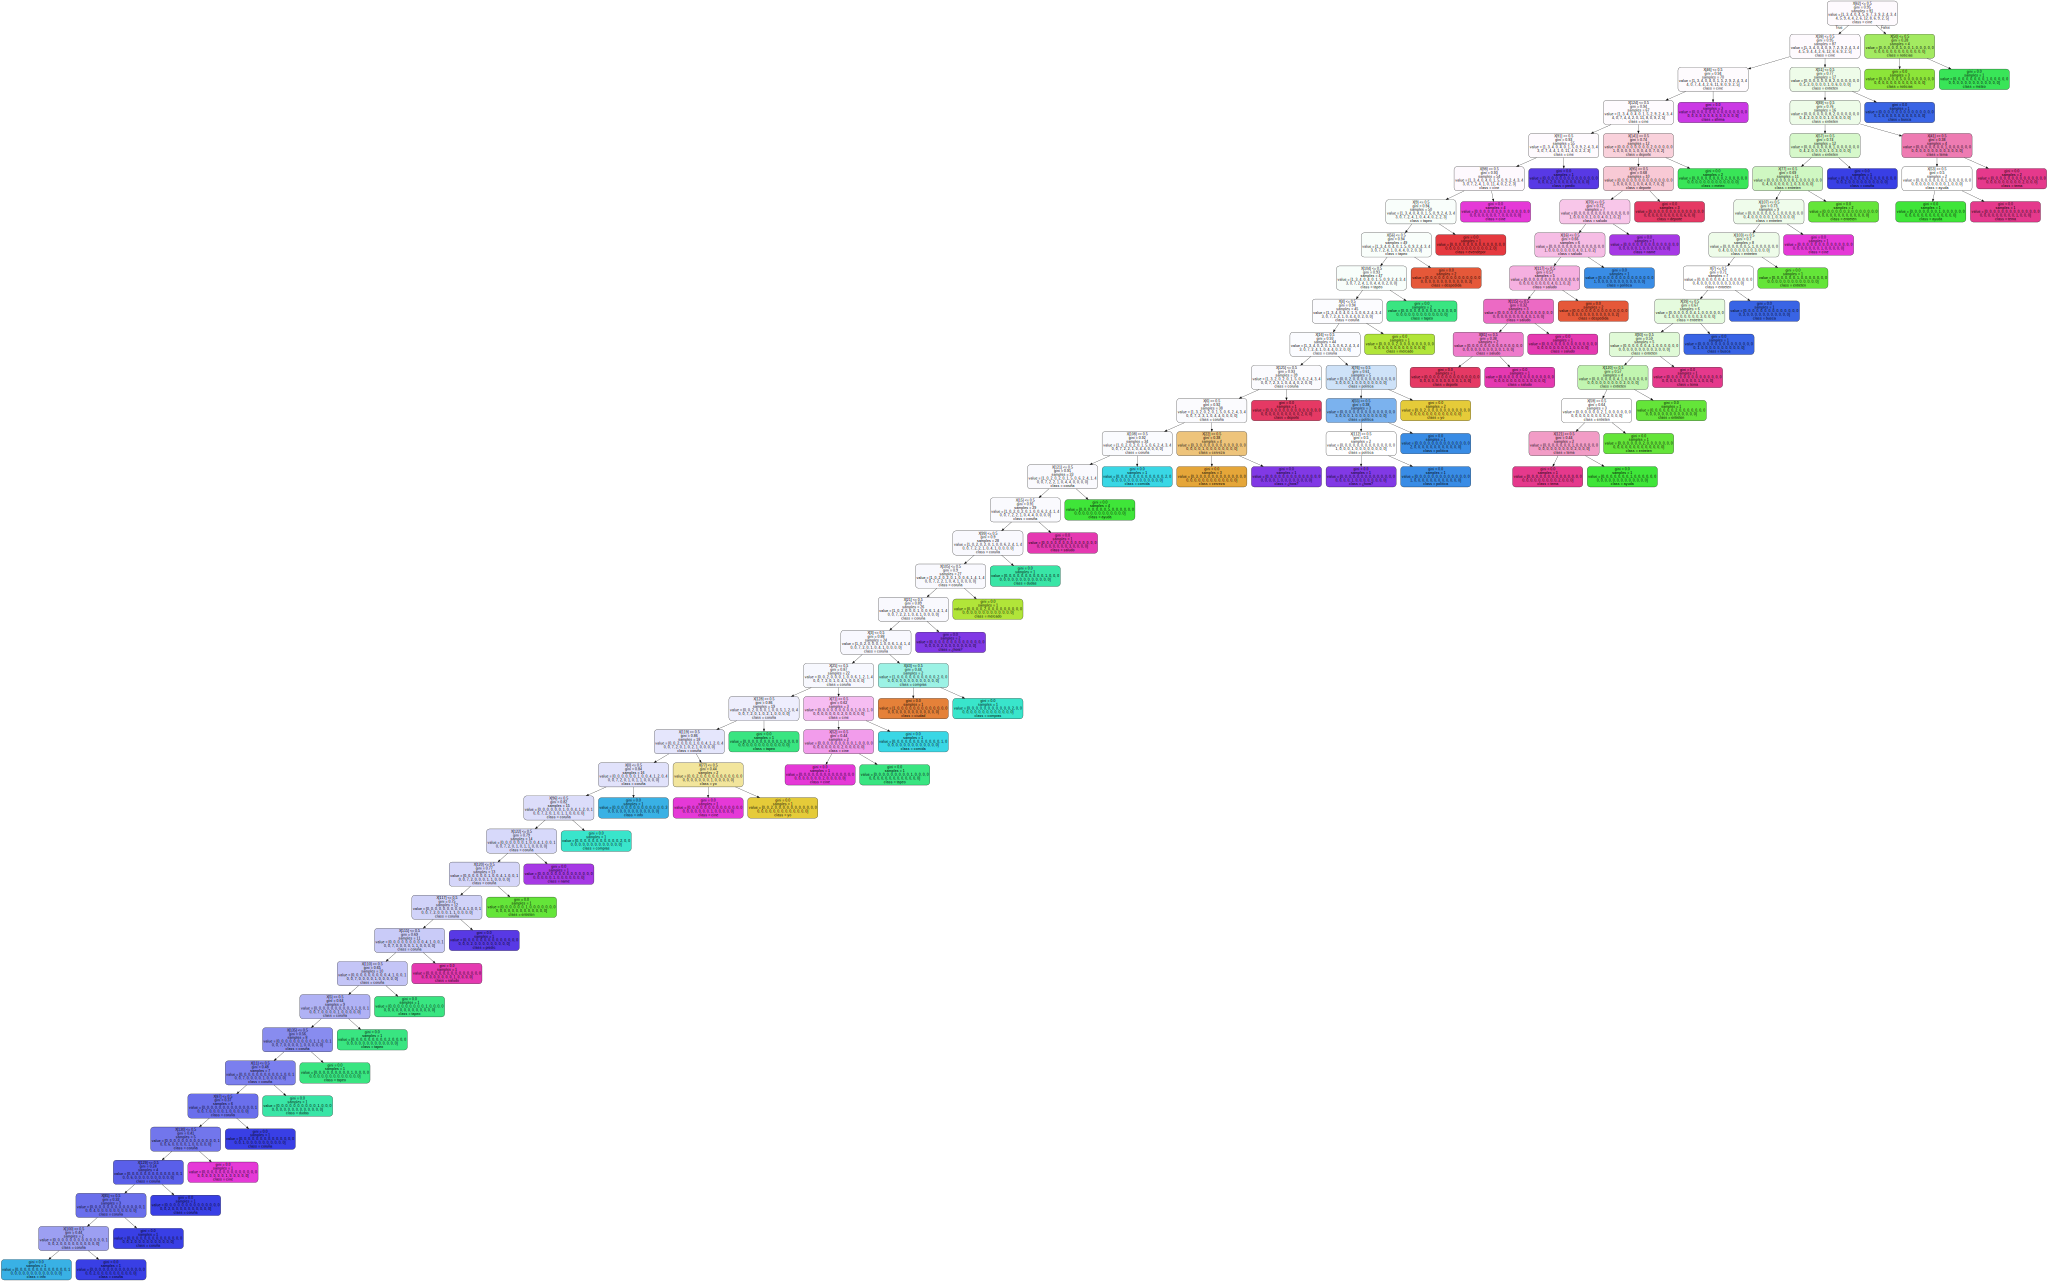

In [ ]:
import graphviz as viz;

from sklearn.tree import export_graphviz;

export_graphviz(clf.estimators_[0],
                out_file='tree.dot',
                feature_names =None, #X.columns,
                class_names = classes,
                rounded = True,
                proportion = False,
                precision = 2,
                filled = True)

viz.Source.from_file("tree.dot")

##Lo ponemos en producción

In [ ]:
import numpy as np;
import stanza;

stanza.download('es')

nlp = stanza.Pipeline(lang='es', processors='tokenize, pos, lemma, ner');

2022-03-14 15:50:46 INFO: Downloading default packages for language: es (Spanish)...
2022-03-14 15:50:48 INFO: File exists: /root/stanza_resources/es/default.zip.
2022-03-14 15:50:54 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-03-14 15:50:54 WARNING: Language es package default expects mwt, which has been added
2022-03-14 15:50:54 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| ner       | conll02 |

2022-03-14 15:50:54 INFO: Use device: cpu
2022-03-14 15:50:54 INFO: Loading: tokenize
2022-03-14 15:50:54 INFO: Loading: mwt
2022-03-14 15:50:54 INFO: Loading: pos
2022-03-14 15:50:55 INFO: Loading: lemma
2022-03-14 15:50:55 INFO: Loading: ner
2022-03-14 15:50:56 INFO: Done loading processors!


In [ ]:
context={};

def detectEntity(sentence):
    for word in sentence.words:
        if word.upos=="PROPN": return word.text;
    return None;


def botanswer(query):
    answers="";
    text=nlp(query);
    for sentence in text.sentences:
        entity=detectEntity(sentence);
        words=[word.lemma for word in sentence.words];
        l=[word in words for word in bow];
        prob=clf.predict_proba([l]);
        idx=np.argmax(prob);
        if prob[0][idx] >= 0.50:
          answer=RESPONSES[intents[idx]];
          if entity!=None:
             context["@"+intents[idx]]=entity;
          if type(answer) in [list, tuple]:
              idx=np.random.randint(0,len(answer));
              answer=answer[idx];
          elif answer=="@hora":
              answer=str(datetime.now());
          elif answer=="@predic":
              answer=str("aquí puedes ver la predicción: https://www.meteogalicia.gal/web/inicio.action")
          for var in context:
              answer=answer.replace(var,context[var]);
          answers += answer
        else:
          answers += "Disculpa, no te he entendido.";
          break;

    return answers;

while True:
    query = input("User>> ");
    if len(query)==0:
       break;
    print("Bot>> {}".format(botanswer(query)));
    #print(context);





User>> 
